## Importing the libraries

In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
RANDOM_STATE = 42
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the DataSet

In [83]:
Insurance = pd.read_csv("Insurance.csv")
Insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Charges refers to the amount of money spent by the person for a calender year. it's also our target

## Exploratory Data Analysis

In [84]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
Insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the our numerical data, we see that the mean and the median are significantly far off from each other in our target, unlike that of Age, Bmi, and Children. This, however, indicates that there is a form of skewness with our target, Charges. 

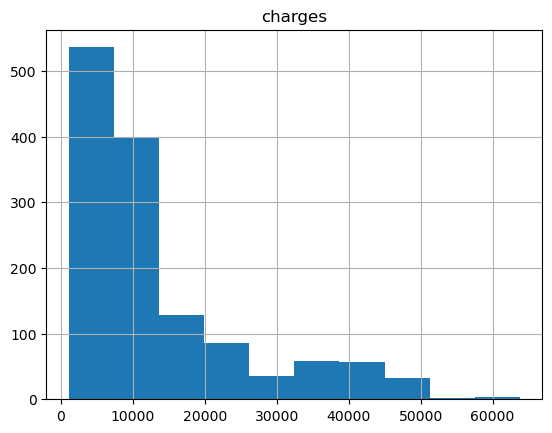

In [86]:
Insurance.hist('charges')
plt.show()

The histogram reveals the skewness. But what we want is a normal distribution for more accuracy in a linear fashion. We can use a base 2 log to transform the column. 

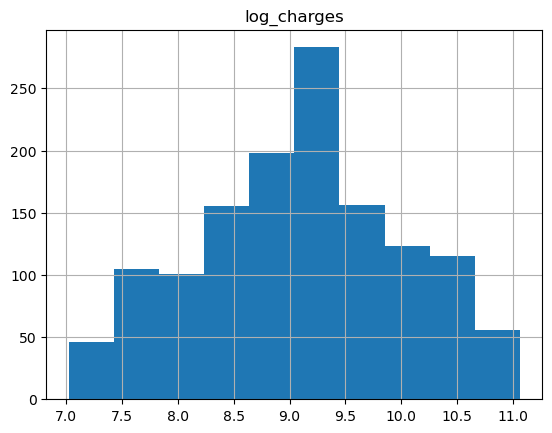

In [87]:
Insurance["log_charges"] = np.log(Insurance["charges"])

Insurance.hist('log_charges')
plt.show()

We can see that it is more normally distributed now.

Checking to find correlation between our independent variables and our depended variable, `charges`

In [88]:
correlations = Insurance.select_dtypes(['number']).corr()
correlations
print(correlations.shape)

(5, 5)


we see that there is no correlation between children and charges or children and log_charges

To look at the the correlation graphically:

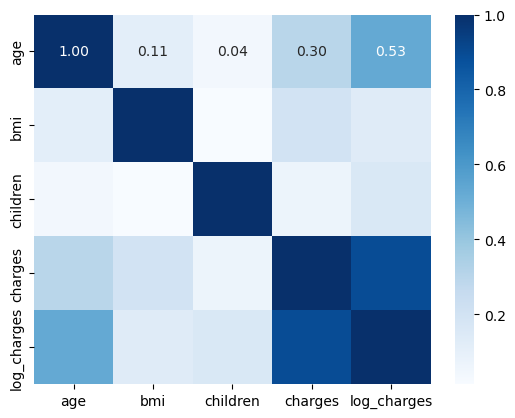

<Figure size 1000x800 with 0 Axes>

In [89]:
sns.heatmap(correlations, cmap='Blues', annot=True, fmt='.2f')
plt.figure(figsize=(10,8))
plt.tight_layout()  
plt.show()

Using `pairplot`:

In [90]:
Insurance_numeric = Insurance_numeric.replace([np.inf, -np.inf], np.nan).dropna()

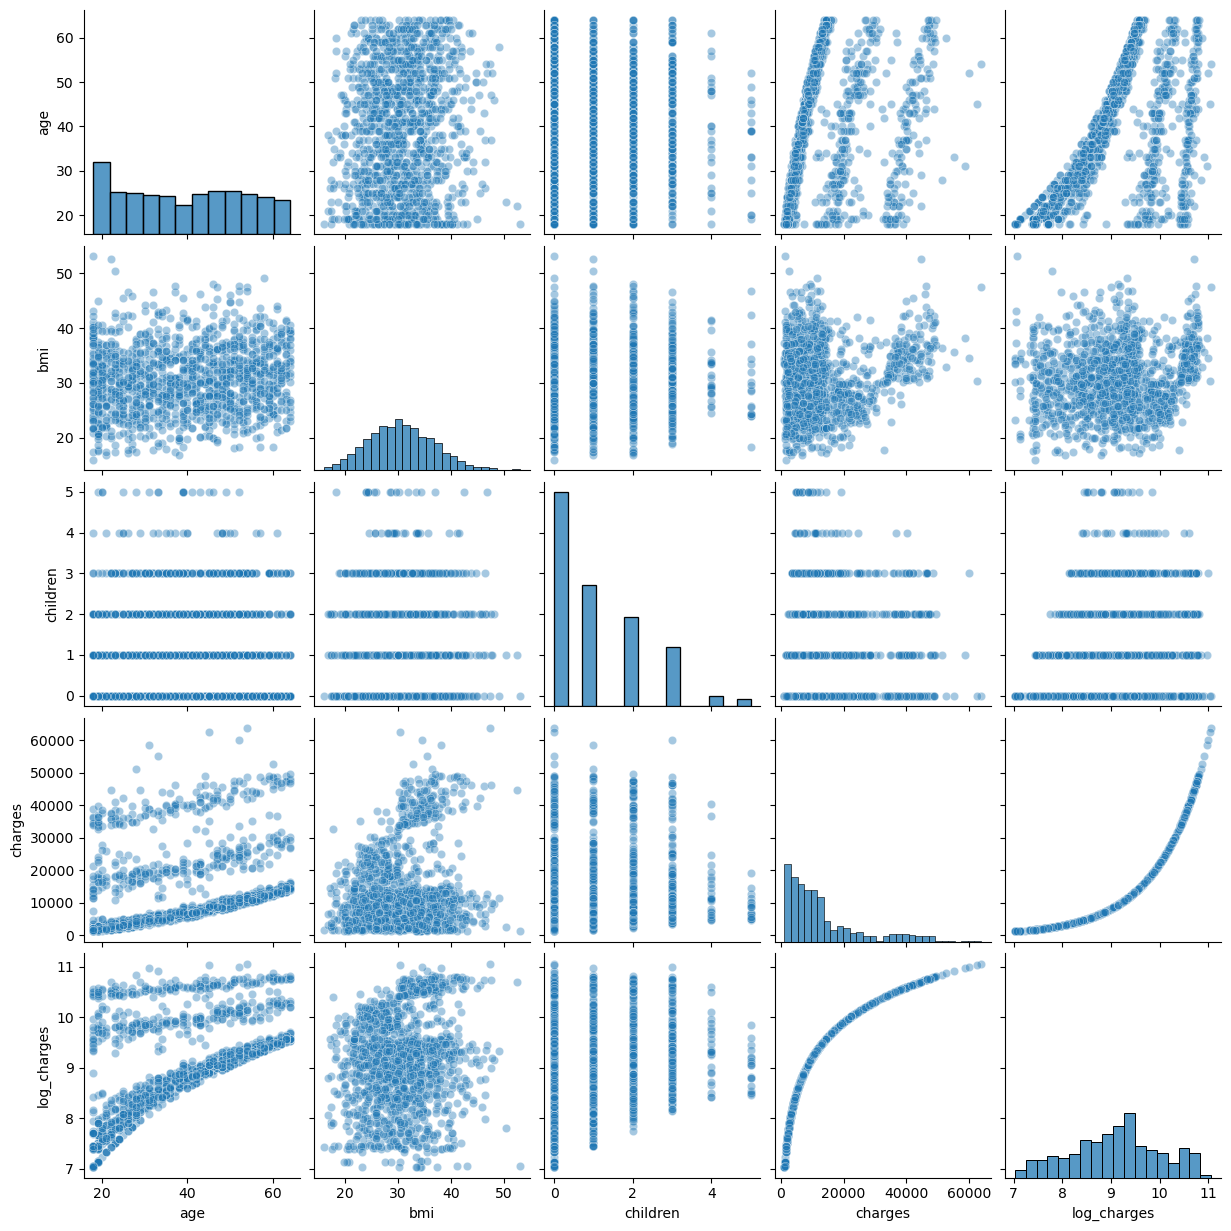

In [91]:
Insurance_numeric = Insurance.select_dtypes(np.number)
sns.pairplot(Insurance_numeric, kind = 'scatter', plot_kws={'alpha': 0.4})

Children vs log_charges, and Children vs charges shows long bands visually. This is because children have discrete variables. There's 3 distinct band between age and charges.

### looking at our Categorical Variables

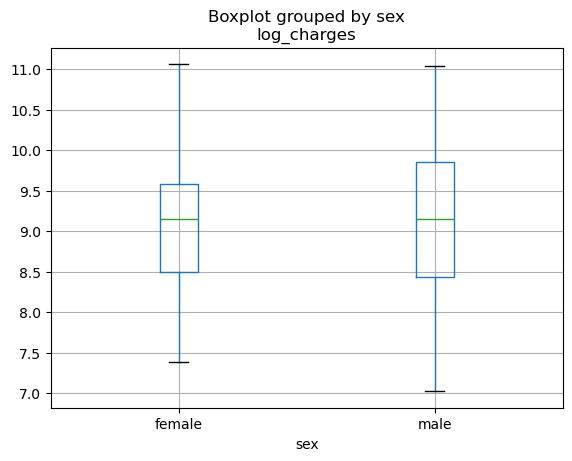

In [92]:
Insurance.boxplot(column=['log_charges'], by='sex')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

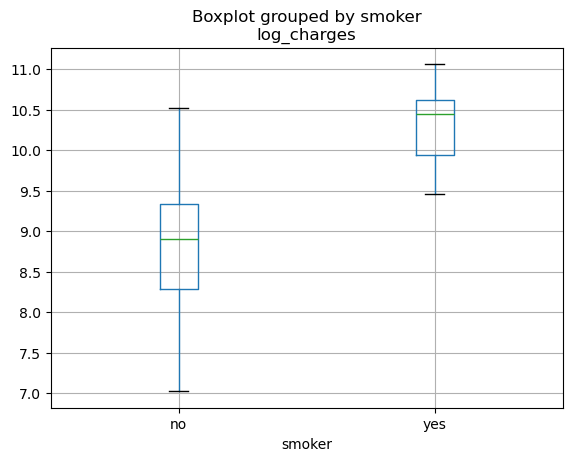

In [93]:
Insurance.boxplot(column=["log_charges"], by='smoker')
plt.show

the yes-smoker box has a higher values for median, lower quartile, and upper-quartile cost-wese. So it might be useful to our model

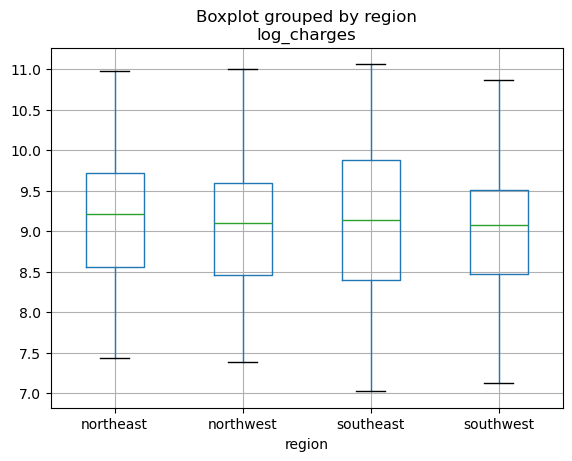

In [94]:
Insurance.boxplot(column=['log_charges'], by='region')
plt.show()

## Spliting our Data

In [99]:
Insurance['is_smoker'] = (Insurance['smoker']=="yes")
#convert yes to numerical 1 and 0 and add column to our data

X = Insurance[['age', 'bmi', 'is_smoker']]
y = Insurance['log_charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=RANDOM_STATE)

## Building our Model

In [100]:
from sklearn.linear_model import LinearRegression

Insurance_model = LinearRegression()
Insurance_model.fit(X_train, y_train)
Insurance_model.coef_

array([0.03525471, 0.01083897, 1.547207  ])

In [102]:
C_Insurance = pd.DataFrame(Insurance_model.coef_, X.columns, columns=['Coef'])
print (C_Insurance)

               Coef
age        0.035255
bmi        0.010839
is_smoker  1.547207


We wanna predict with out trained value

In [103]:
y_pred = Insurance_model.predict(X_train)

In [104]:
y_pred

array([ 8.17257058,  8.34453469,  9.29835904, ...,  9.38770597,
       10.43762797,  9.33315597])

In [105]:
from sklearn.metrics import mean_squared_error 
train_mse = mean_squared_error(y_train, y_pred)
train_mse

0.21520412786852908

In [106]:
# undoing the log transformation:
train_mse_orig_scale = np.exp2(mean_squared_error(y_train, y_pred))
train_mse_orig_scale

1.1608681547615856

This is our Mean square error for the traininng set